<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module2-join-datasets/LS_DS_122_Join_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join datasets

Objectives
- concatenate data with pandas
- merge data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Combine Data Sets: Standard Joins
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-26 20:47:42--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.1.46
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.1.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  47.0MB/s    in 4.3s    

2019-03-26 20:47:46 (45.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


## Goal: Reproduce this example

The first two orders for user id 1:

In [4]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [5]:
!ls -lh

total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [0]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')

In [7]:
aisles.shape

(134, 2)

In [8]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
display(example)

### departments

In [0]:
departments = pd.read_csv('departments.csv')

In [11]:
departments.shape

(21, 2)

In [12]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### order_products__prior

In [0]:
op_prior = pd.read_csv('order_products__prior.csv')

In [14]:
op_prior.shape

(32434489, 4)

In [15]:
op_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# Remember this
op_prior.groupby('order_id')['product_id'].count()

*** Contains:***
- order_id
-product_id
- add_to_cart_order

### order_products__train

In [0]:
op_train = pd.read_csv('order_products__train.csv')

In [18]:
op_train.shape

(1384617, 4)

In [19]:
op_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


**contains same colums as op_prior**

### orders

In [0]:
orders = pd.read_csv('orders.csv')

In [21]:
orders.shape

(3421083, 7)

In [22]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


**orders has:**
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [0]:
display(example)

### products

In [0]:
products = pd.read_csv('products.csv')

In [25]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


**products has:**
- product_id
- product_name

## Concatenate order_products__prior and order_products__train

In [0]:
order_products = pd.concat([op_prior, op_train])

In [27]:
order_products.shape, op_prior.shape, op_train.shape

((33819106, 4), (32434489, 4), (1384617, 4))

In [28]:
print(len(order_products) == len(op_prior) + len(op_train))
assert len(order_products) == len(op_prior) + len(op_train) # In jupyter

True


In [0]:
assert(len(order_products.columns) ==
      len(op_prior.columns) ==
      len(op_train.columns))

In [30]:
rows, columns = order_products.shape

print('Rows:', rows)
print('Columns:', columns)

Rows: 33819106
Columns: 4


In [0]:
a_rows, a_columns = op_prior.shape
b_rows, b_columns = op_train.shape
c_rows, c_columns = order_products.shape
assert a_columns == b_columns == c_columns
assert a_rows + b_rows == c_rows

In [32]:
condition = order_products['order_id']==2539329
order_products[condition]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


## Get a subset of orders — the first two orders for user id 1

In [0]:
condition = (orders['user_id']==1) & (orders['order_number'] <= 2)

columns = ['user_id',
          'order_id',
          'order_number',
          'order_dow',
          'order_hour_of_day']

orders[condition][columns]

subset = orders.loc[condition, columns]


## Merge dataframes

In [0]:
columns = ['order_id','add_to_cart_order', 'product_id']
merged = pd.merge(subset, order_products[columns], how='inner', on='order_id')

In [35]:
subset.shape

(2, 5)

In [0]:
order_products

In [37]:
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [0]:
final_merge = pd.merge(merged, products[['product_id','product_name']])

In [39]:
merged.shape, products[['product_id', 'product_name']].shape, final_merge.shape

((11, 7), (49688, 2), (11, 8))

In [0]:
final_merge = final_merge.sort_values(by=['order_number', 'add_to_cart_order'])

In [0]:
final_merge.columns = [column.replace('_', ' ') for column in final_merge]

In [42]:
final_merge

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name


In [72]:
display(example)

# Assignment

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Stretch challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

- order_id:  order_products
- product_id: order_products
- product_id: products
- product_name: products

In [57]:
order_products[order_products['order_id'] == 2]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [63]:
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [51]:
products.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [0]:

# count the number of times each item is ordered and get top 10
top10 = (order_products['product_id'].value_counts()[:10].index.tolist()) 

# set condition
condition_top10 = (order_products['product_id'].isin(top10))

# columns to use
op_columns = ['order_id', 'product_id']

# select only products from top 10 most ordered
op_top10 = order_products.loc[condition_top10, op_columns]

In [0]:
# make sure it worked
op_top10

In [0]:
# merge dataframes
merged_10 = pd.merge(products[['product_id', 'product_name']], op_top10)

In [104]:
# checking my work

print(merged_10['product_name'].value_counts(), '\n\n')
print(order_products['product_id'].value_counts()[:10])

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64 


24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
Name: product_id, dtype: int64


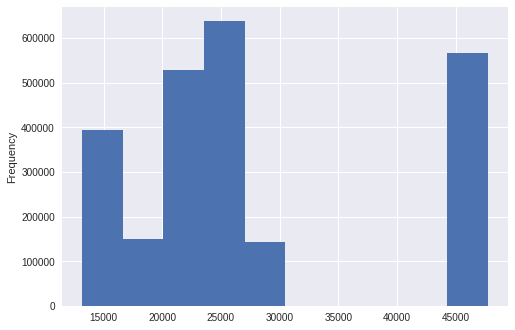

In [107]:
merged_10['product_id'].plot.hist()

In [0]:
orders_count = [order_products['product_id'].value_counts().index.tolist(),
                order_products['product_id'].value_counts().values.tolist()]


In [146]:
orders_count[1]

[491291,
 394930,
 275577,
 251705,
 220877,
 184224,
 160792,
 149445,
 146660,
 142813,
 142603,
 117716,
 113936,
 109412,
 105026,
 99728,
 92889,
 91251,
 88078,
 87272,
 86748,
 85005,
 83320,
 80493,
 79245,
 79006,
 78056,
 76929,
 75752,
 75655,
 75233,
 74235,
 74172,
 73050,
 71641,
 71151,
 70804,
 70714,
 70076,
 66827,
 64589,
 63114,
 63021,
 61669,
 61116,
 60919,
 60071,
 59878,
 58312,
 58269,
 58185,
 58005,
 57831,
 56643,
 54507,
 54094,
 52497,
 52369,
 52323,
 52124,
 52021,
 51738,
 50808,
 49374,
 48512,
 47450,
 46932,
 44976,
 44828,
 44737,
 44701,
 44477,
 44460,
 43261,
 42274,
 42165,
 41812,
 41303,
 41052,
 40498,
 40373,
 39577,
 39271,
 38686,
 38631,
 38537,
 37689,
 37566,
 37562,
 37298,
 37102,
 36968,
 36869,
 36620,
 36048,
 36028,
 35551,
 35384,
 34248,
 34211,
 33800,
 33708,
 33242,
 33143,
 33130,
 32658,
 32270,
 32212,
 32194,
 32069,
 31432,
 31196,
 30970,
 30866,
 30731,
 30565,
 30517,
 30310,
 30229,
 30009,
 29507,
 29174,
 29047,
 

In [147]:
order_product

<generator object <genexpr> at 0x7efe206db938>

In [117]:
order_products['product_id'].value_counts()[:10]

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
Name: product_id, dtype: int64

In [115]:
orders['order_hour_of_day'].value_counts().

array([288418, 284728, 283639, 283042, 277999, 272841, 272553, 257812,
       228795, 182912, 178201, 140569, 104292,  91868,  78109,  61468,
        40043,  30529,  22758,  12398,   9569,   7539,   5527,   5474])

In [136]:
order_products['product_id'].value_counts()[:10].index

Int64Index([24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209,
            27845],
           dtype='int64')